In [1]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; the foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

In [2]:
monthly_df = pd.read_csv('data/housing_in_london_monthly_variables.csv')
yearly_df = pd.read_csv('data/housing_in_london_yearly_variables.csv')

In [3]:
monthly_df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [4]:
yearly_df

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,K03000001,great britain,2019-12-01,30446.0,NaN,37603,NaN,NaN,NaN,NaN,NaN,0
1067,K04000001,england and wales,2019-12-01,30500.0,NaN,37865,NaN,NaN,NaN,NaN,NaN,0
1068,N92000002,northern ireland,2019-12-01,27434.0,NaN,32083,NaN,NaN,NaN,NaN,NaN,0
1069,S92000003,scotland,2019-12-01,30000.0,NaN,34916,NaN,NaN,NaN,NaN,NaN,0


In [5]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [6]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [7]:
monthly_df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [8]:
yearly_df.isnull().sum()

code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64

In [9]:
monthly_df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


In [10]:
yearly_df.describe()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
count,1049.000000,352.000000,1.018000e+03,9.310000e+02,6.660000e+02,6.660000e+02,1071.000000
mean,27977.792183,7.485057,6.042576e+06,3.188095e+06,3.724903e+05,8.814682e+05,0.647059
std,6412.807487,0.198451,1.526810e+07,8.058302e+06,2.157060e+06,3.690376e+06,0.478108
min,15684.000000,7.000000,6.581000e+03,4.700000e+04,3.150000e+02,5.009000e+03,0.000000
25%,23857.000000,7.350000,2.243458e+05,9.450000e+04,2.960000e+03,8.763550e+04,0.000000
50%,27441.000000,7.510000,2.946035e+05,1.570000e+05,4.323000e+03,1.024020e+05,1.000000
75%,30932.000000,7.640000,4.630098e+06,2.217000e+06,8.220000e+03,1.262760e+05,1.000000
max,61636.000000,7.960000,6.643555e+07,3.575000e+07,1.330373e+07,2.417217e+07,1.000000


In [11]:
# Convert columns to appropriate types if necessary
monthly_df['houses_sold'] = pd.to_numeric(monthly_df['houses_sold'], errors='coerce')
yearly_df['median_salary'] = pd.to_numeric(yearly_df['median_salary'], errors='coerce')
yearly_df['recycling_pct'] = pd.to_numeric(yearly_df['recycling_pct'], errors='coerce')
yearly_df['population_size'] = pd.to_numeric(yearly_df['population_size'], errors='coerce')
yearly_df['number_of_jobs'] = pd.to_numeric(yearly_df['number_of_jobs'], errors='coerce')
yearly_df['area_size'] = pd.to_numeric(yearly_df['area_size'], errors='coerce')
yearly_df['no_of_houses'] = pd.to_numeric(yearly_df['no_of_houses'], errors='coerce')
monthly_df['date'] = pd.to_datetime(monthly_df['date'])
yearly_df['date'] = pd.to_datetime(yearly_df['date'])

In [12]:
# Remove the 'borough_flag' column from the monthly DataFrame
monthly_df_cleaned = monthly_df.drop(columns=['borough_flag'])

# Impute missing values in 'houses_sold' with the median
houses_sold_median = monthly_df_cleaned['houses_sold'].median()
monthly_df_cleaned['houses_sold'].fillna(houses_sold_median, inplace=True)

# Remove the 'life_satisfaction' & 'borough_flag' column from the yearly DataFrame
yearly_df_cleaned = yearly_df.drop(columns=['life_satisfaction','borough_flag'])

# Impute missing values in numerical columns with the median
numerical_columns = ['median_salary', 'recycling_pct', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses']
for column in numerical_columns:
    median_value = yearly_df_cleaned[column].median()
    yearly_df_cleaned[column].fillna(median_value, inplace=True)
    
# Replace NaN in 'no_of_crimes' with 0
monthly_df_cleaned['no_of_crimes'].fillna(0, inplace=True)


In [13]:
# Define the list of valid London boroughs
valid_boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden", "Croydon", 
    "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith and Fulham", "Haringey", 
    "Harrow", "Havering", "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea", 
    "Kingston upon Thames", "Lambeth", "Lewisham", "Merton", "Newham", "Redbridge", 
    "Richmond upon Thames", "Southwark", "Sutton", "Tower Hamlets", "Waltham Forest", 
    "Wandsworth", "Westminster", "City of London"
]

# Clean the 'area' column in the monthly DataFrame
monthly_df_cleaned = monthly_df_cleaned[monthly_df_cleaned['area'].str.title().isin(valid_boroughs)]

# Clean the 'area' column in the yearly DataFrame
yearly_df_cleaned = yearly_df_cleaned[yearly_df_cleaned['area'].str.title().isin(valid_boroughs)]

In [14]:
monthly_df_cleaned

,date,area,average_price,code,houses_sold,no_of_crimes
602,1995-01-01,barnet,93285,E09000003,332.0,0.0
603,1995-02-01,barnet,93190,E09000003,327.0,0.0
604,1995-03-01,barnet,92248,E09000003,384.0,0.0
605,1995-04-01,barnet,90763,E09000003,304.0,0.0
606,1995-05-01,barnet,90258,E09000003,393.0,0.0
...,...,...,...,...,...,...
9933,2019-09-01,westminster,925955,E09000033,169.0,6384.0
9934,2019-10-01,westminster,927864,E09000033,168.0,7208.0
9935,2019-11-01,westminster,955615,E09000033,150.0,6843.0
9936,2019-12-01,westminster,968404,E09000033,371.0,7461.0


In [15]:
yearly_df_cleaned

,code,area,date,median_salary,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses
2,E09000003,barnet,1999-12-01,19568.0,23128,8.0,313469.0,157000.0,4323.0,102402.0
3,E09000004,bexley,1999-12-01,18621.0,21386,18.0,217458.0,157000.0,4323.0,102402.0
4,E09000005,brent,1999-12-01,18532.0,20911,6.0,260317.0,157000.0,4323.0,102402.0
5,E09000006,bromley,1999-12-01,16720.0,21293,13.0,294902.0,157000.0,4323.0,102402.0
6,E09000007,camden,1999-12-01,23677.0,30249,13.0,190003.0,157000.0,4323.0,102402.0
...,...,...,...,...,...,...,...,...,...,...
1048,E09000029,sutton,2019-12-01,32947.0,37392,27.0,294603.5,157000.0,4323.0,102402.0
1049,E09000030,tower hamlets,2019-12-01,46142.0,69434,27.0,294603.5,157000.0,4323.0,102402.0
1050,E09000031,waltham forest,2019-12-01,30718.0,33119,27.0,294603.5,157000.0,4323.0,102402.0
1051,E09000032,wandsworth,2019-12-01,34168.0,39617,27.0,294603.5,157000.0,4323.0,102402.0


In [16]:
monthly_df_cleaned.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

In [17]:
yearly_df_cleaned.isnull().sum()

code               0
area               0
date               0
median_salary      0
mean_salary        0
recycling_pct      0
population_size    0
number_of_jobs     0
area_size          0
no_of_houses       0
dtype: int64

In [18]:
monthly_df_cleaned.describe()

,average_price,houses_sold,no_of_crimes
count,8.130000e+03,8130.000000,8130.000000
mean,2.724934e+05,339.428782,1767.008610
std,1.627066e+05,139.405903,1245.617588
min,5.315400e+04,58.000000,0.000000
25%,1.556612e+05,235.000000,953.750000
50%,2.427295e+05,318.000000,2026.000000
75%,3.580328e+05,421.000000,2536.000000
max,1.117408e+06,1073.000000,7461.000000


In [19]:
yearly_df_cleaned.describe()

,median_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,28936.761905,25.275132,264173.723986,153666.666667,5151.507937,107436.841270
std,5586.827289,12.025964,47382.610618,113976.672959,3063.670641,17050.765535
min,15684.000000,1.000000,175717.000000,66000.000000,1486.000000,77701.000000
25%,25620.500000,16.000000,225040.500000,84500.000000,2991.000000,96997.000000
50%,28657.000000,27.000000,261051.000000,130000.000000,4323.000000,102402.000000
75%,31606.500000,34.000000,297384.000000,157000.000000,5659.000000,119451.000000
max,49369.000000,55.000000,392140.000000,775000.000000,15013.000000,159470.000000


In [20]:
# Function to identify outliers using IQR
def identify_outliers_iqr(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

# Example usage with your dataset
# Replace yearly_df_cleaned and monthly_df_cleaned with your actual DataFrames

# Automatically selecting numeric columns for yearly and monthly datasets
numeric_columns_yearly = yearly_df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns_monthly = monthly_df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Identify outliers for yearly dataset
outliers_yearly = identify_outliers_iqr(yearly_df_cleaned, numeric_columns_yearly)
print("Outliers in Yearly Data (IQR):\n", outliers_yearly.sum())

# Identify outliers for monthly dataset
outliers_monthly = identify_outliers_iqr(monthly_df_cleaned, numeric_columns_monthly)
print("Outliers in Monthly Data (IQR):\n", outliers_monthly.sum())

Outliers in Yearly Data (IQR):
 median_salary      21
recycling_pct       0
population_size     0
number_of_jobs     50
area_size          54
no_of_houses        3
dtype: int64
Outliers in Monthly Data (IQR):
 average_price    180
houses_sold      138
no_of_crimes     156
dtype: int64


In [21]:
# Function to remove outliers using IQR for specified columns
def remove_outliers_iqr(df, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Automatically selecting numeric columns for yearly and monthly datasets
numeric_columns_yearly = yearly_df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns_monthly = monthly_df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Removing outliers for yearly dataset
cleaned_yearly_df = remove_outliers_iqr(yearly_df_cleaned, numeric_columns_yearly)

# Removing outliers for monthly dataset
cleaned_monthly_df = remove_outliers_iqr(monthly_df_cleaned, numeric_columns_monthly)

In [22]:
# Function to create combined box plots for specified columns
# Function to create box plots for specified columns
def create_box_plots(df_before, df_after, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(df_before[column]):
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
            
            # Box plot before removing outliers
            axes[0].boxplot(df_before[column].dropna())
            axes[0].set_title(f'{column} (Before Outlier Removal)')
            axes[0].set_ylabel(column)
            
            # Box plot after removing outliers
            axes[1].boxplot(df_after[column].dropna())
            axes[1].set_title(f'{column} (After Outlier Removal)')
            axes[1].set_ylabel(column)
            
            plt.show()
    
# Remove 'recycling_pct' from the numeric columns for yearly data
if 'recycling_pct' in numeric_columns_yearly:
    numeric_columns_yearly.remove('recycling_pct')

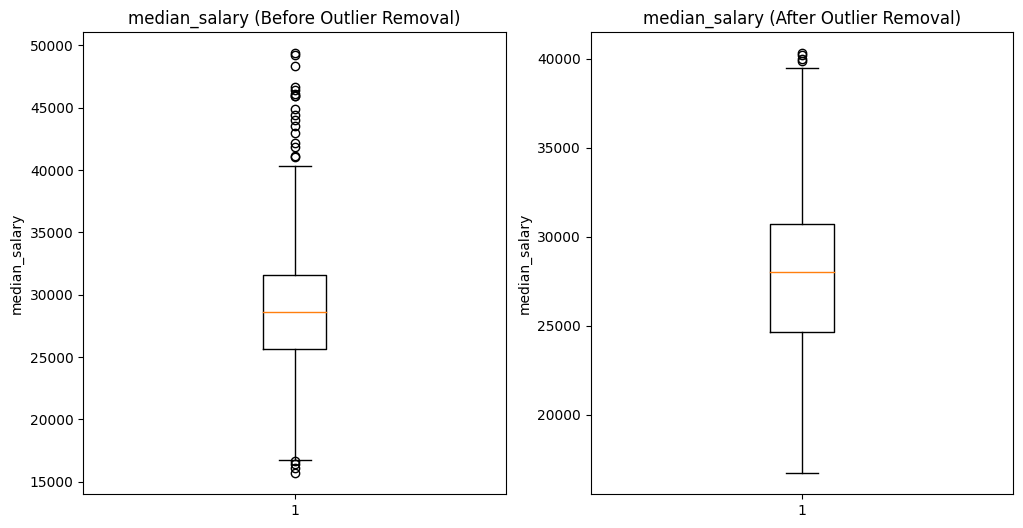

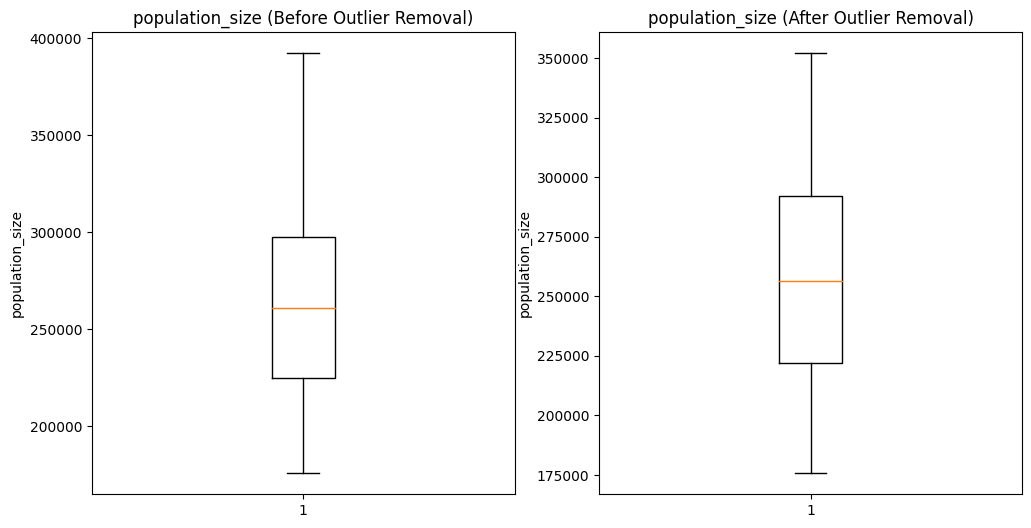

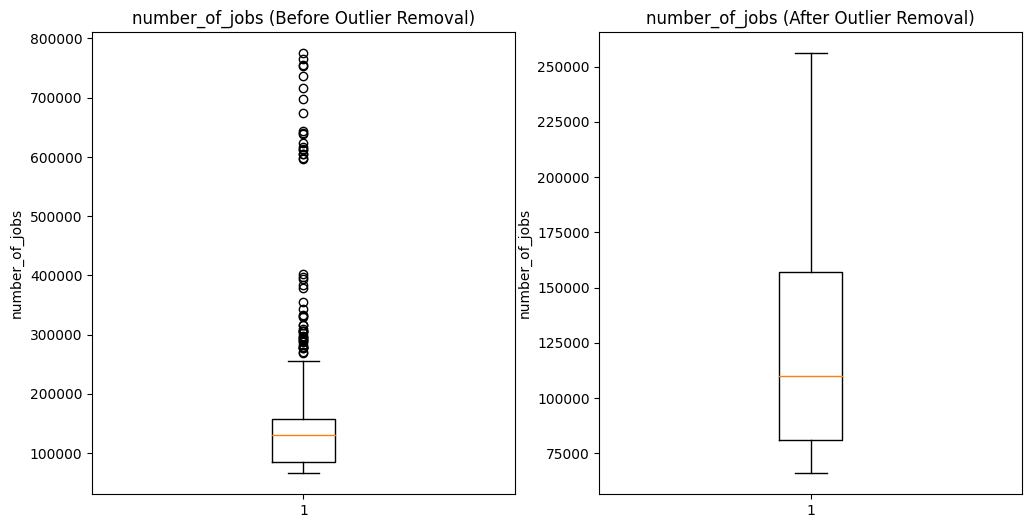

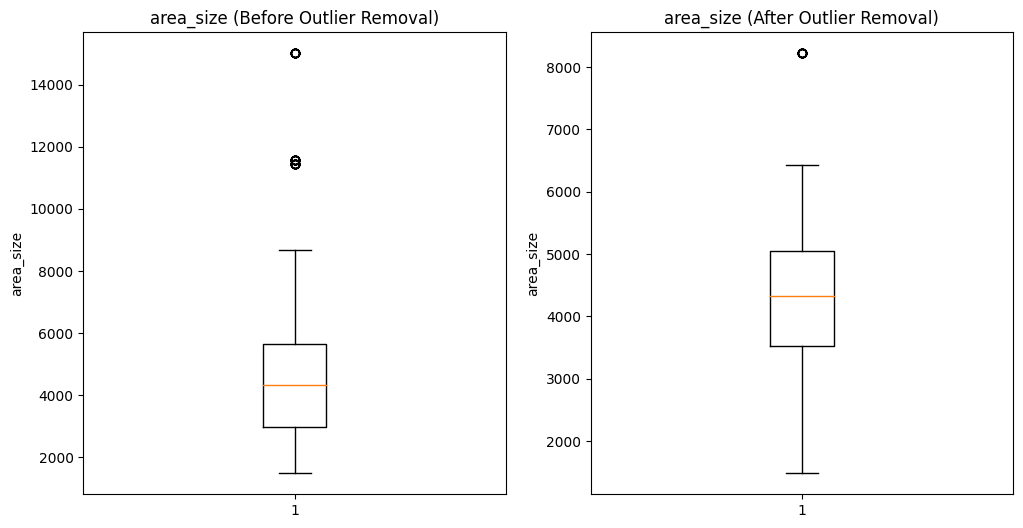

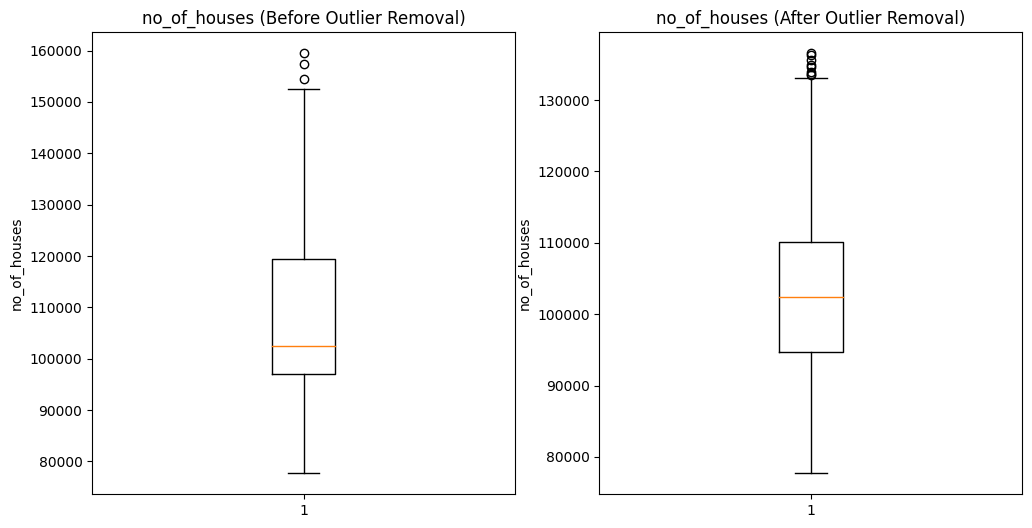

In [23]:
create_box_plots(yearly_df_cleaned, cleaned_yearly_df, numeric_columns_yearly)

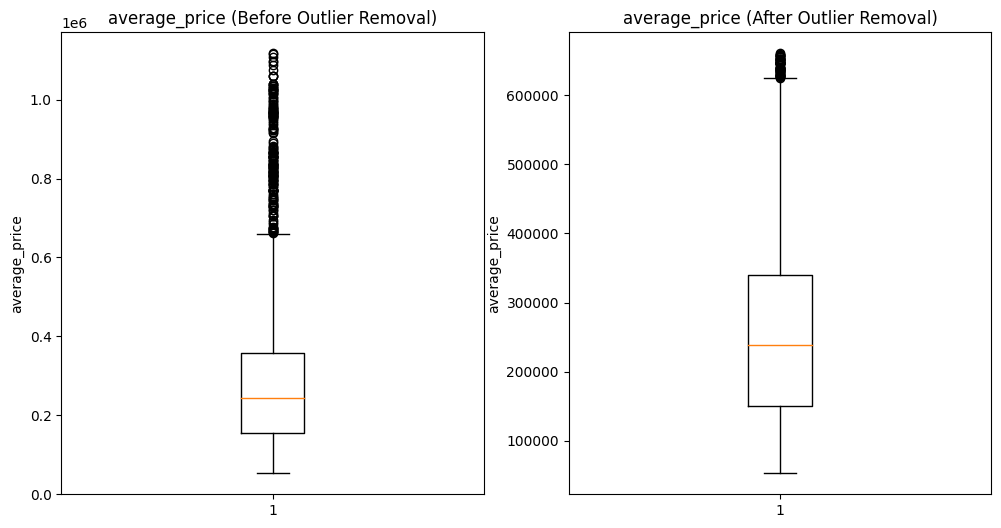

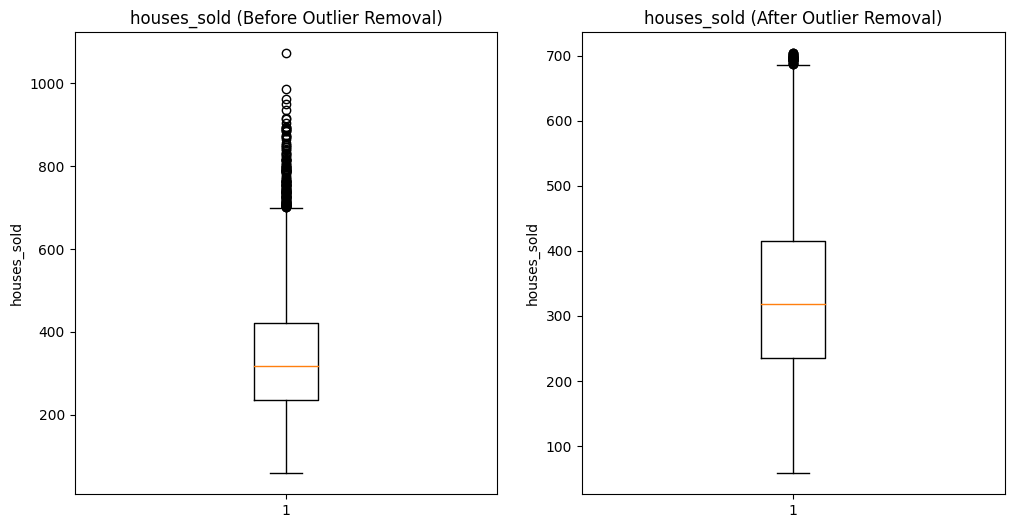

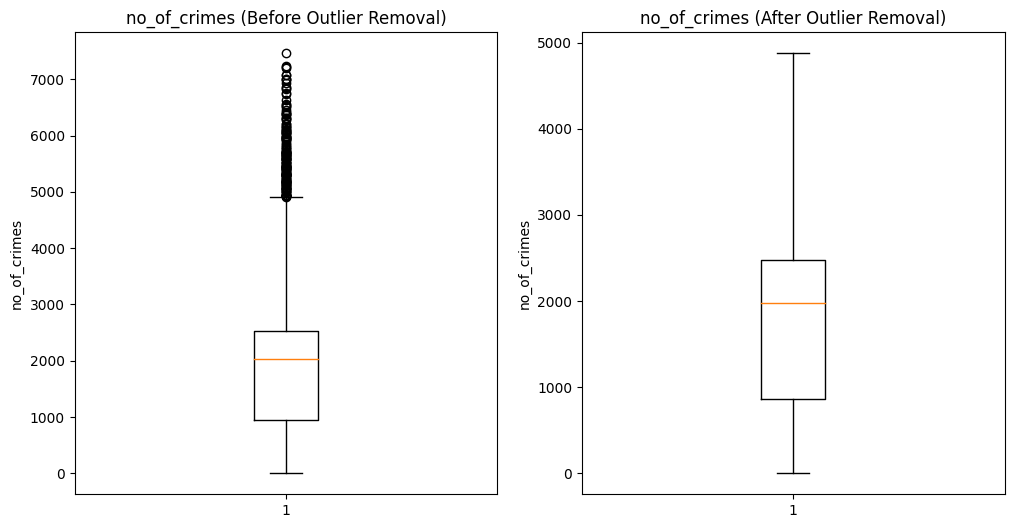

In [24]:
create_box_plots(monthly_df_cleaned, cleaned_monthly_df, numeric_columns_monthly)

In [25]:
cleaned_monthly_df.describe()

,average_price,houses_sold,no_of_crimes
count,7697.000000,7697.000000,7697.000000
mean,256660.623490,333.780694,1656.272574
std,134858.143076,127.429524,1103.186998
min,53154.000000,58.000000,0.000000
25%,150244.000000,236.000000,857.000000
50%,238119.000000,318.000000,1979.000000
75%,339849.000000,416.000000,2480.000000
max,660512.000000,704.000000,4875.000000


In [26]:
cleaned_yearly_df.describe()

,median_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,27890.440098,24.053790,256670.650367,118894.865526,4278.953545,102887.985330
std,4604.194507,12.410939,42568.260208,42524.228366,1456.911480,13754.188259
min,16720.000000,1.000000,175717.000000,66000.000000,1486.000000,77701.000000
25%,24626.000000,14.000000,222015.000000,81000.000000,3532.000000,94682.000000
50%,28005.000000,25.000000,256269.000000,110000.000000,4323.000000,102402.000000
75%,30718.000000,33.000000,291933.000000,157000.000000,5046.000000,110145.000000
max,40303.000000,55.000000,352005.000000,256000.000000,8220.000000,136558.000000


In [27]:
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION
# DATA VISUALISATION

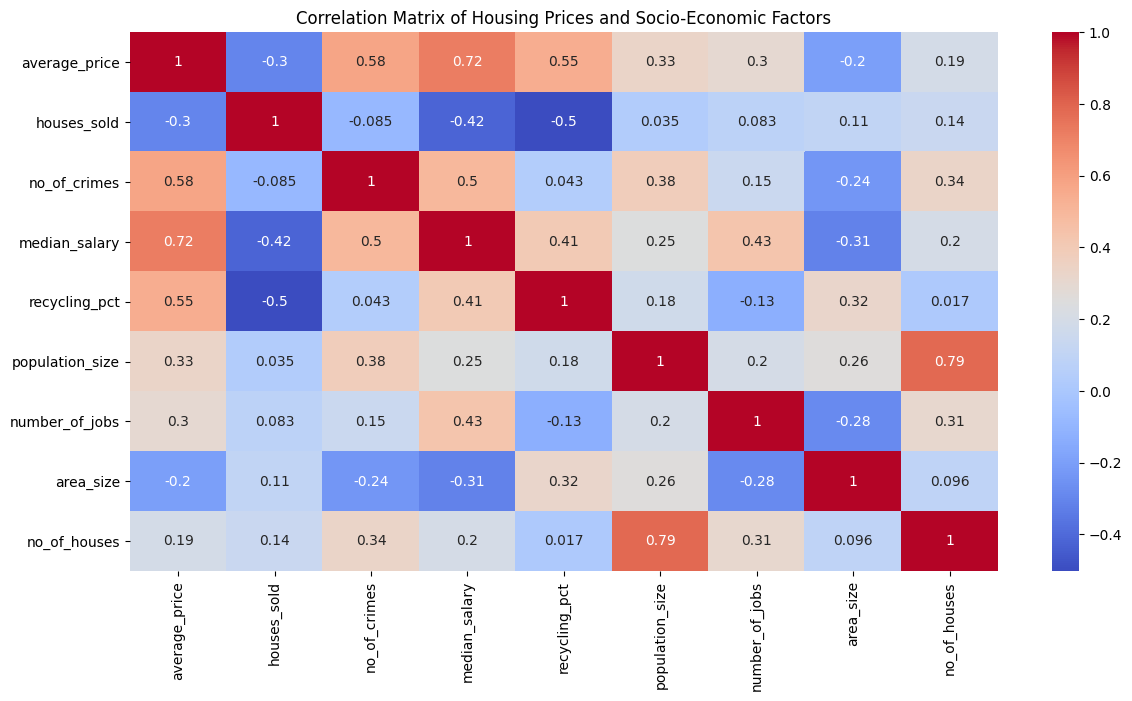

In [28]:
# Correlation of average price with socio-economic factors
merged_df = pd.merge(cleaned_monthly_df, cleaned_yearly_df, on=['date', 'area', 'code'], how='left')
plt.figure(figsize=(14, 7))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Housing Prices and Socio-Economic Factors')
plt.show()

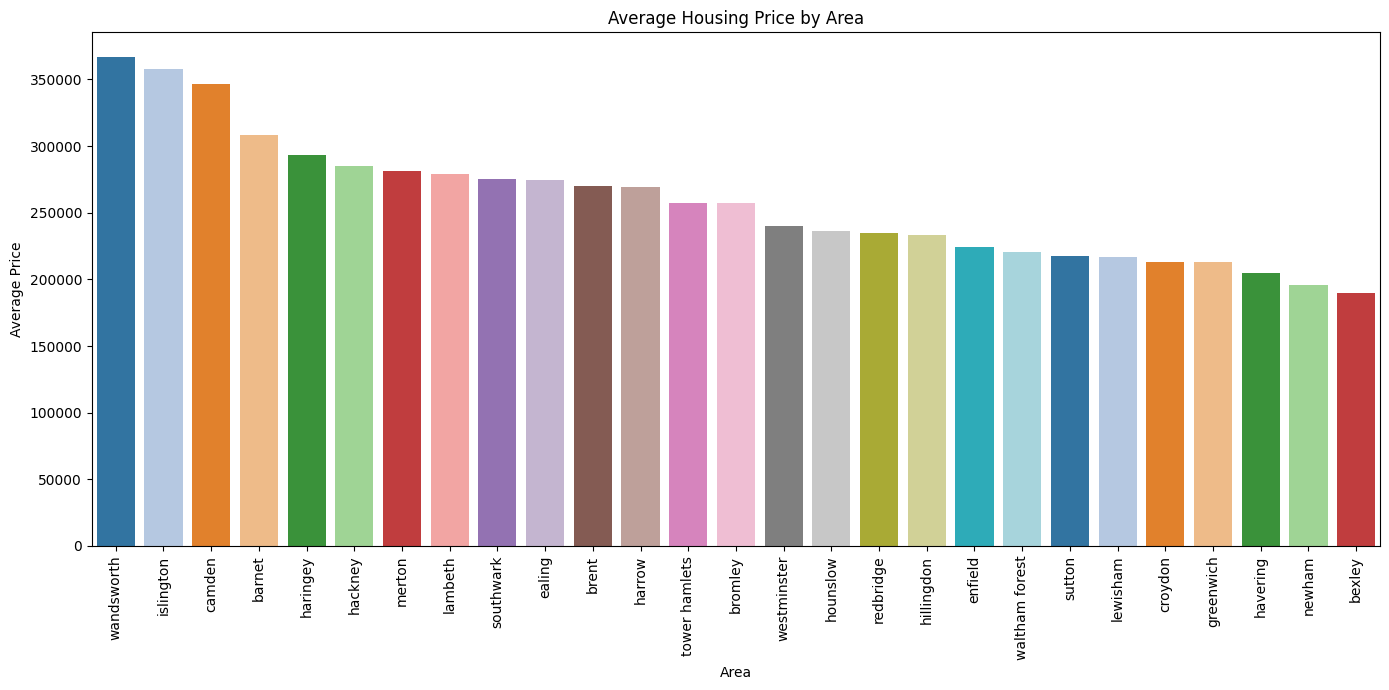

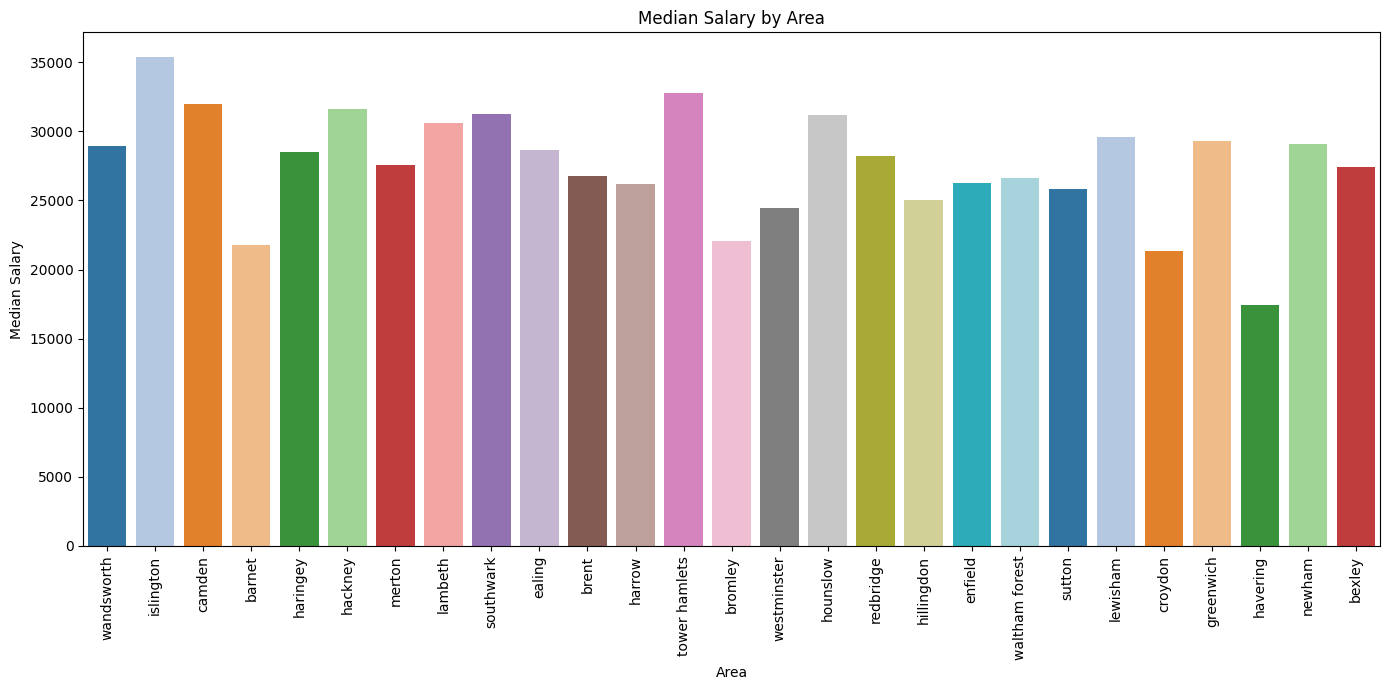

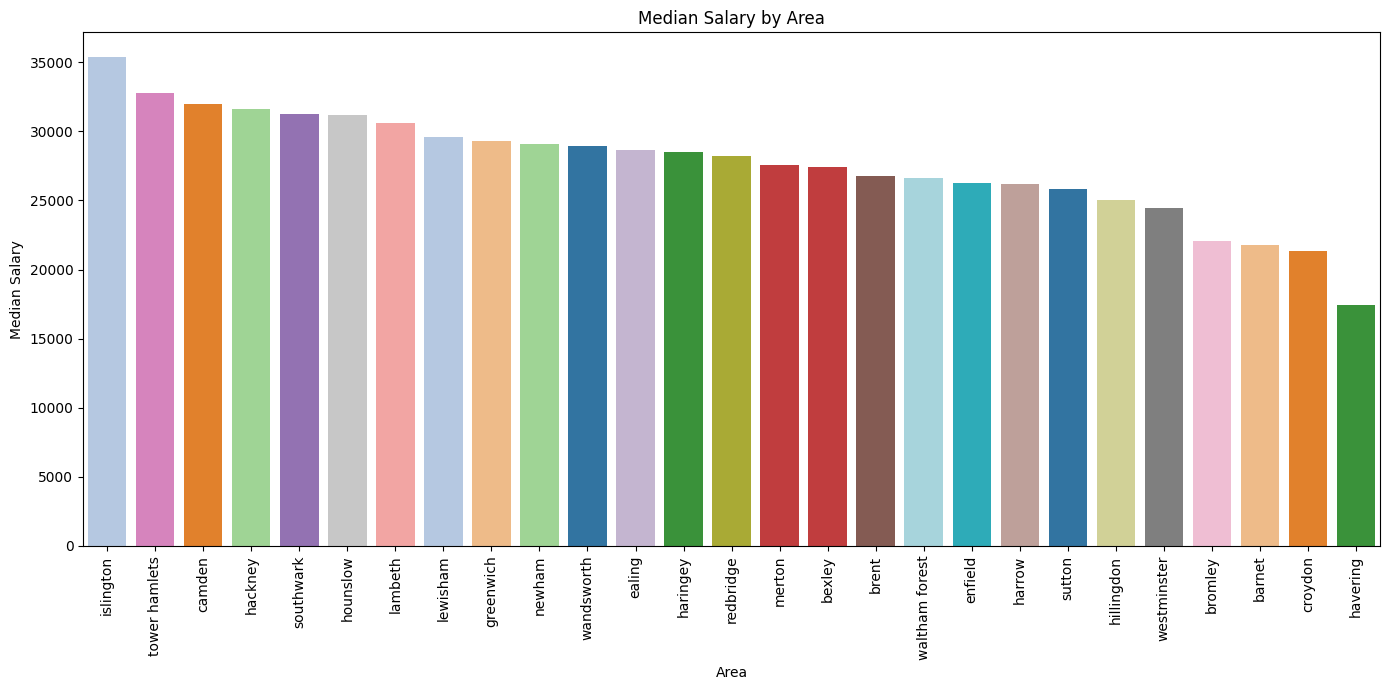

In [29]:
# Calculate average housing price by area
avg_price_by_area = cleaned_monthly_df.groupby('area')['average_price'].mean().reset_index()

# Calculate median salary by area
median_salary_by_area = cleaned_yearly_df.groupby('area')['median_salary'].median().reset_index()

sorted_avg_price_by_area = cleaned_monthly_df.groupby('area')['average_price'].mean().reset_index().sort_values(by='average_price', ascending=False)

# Ensure areas are ordered in the same way
ordered_areas = avg_price_by_area.sort_values(by='average_price', ascending=False)['area']
median_salary_by_area = median_salary_by_area.set_index('area').loc[ordered_areas].reset_index()
avg_price_by_area = avg_price_by_area.set_index('area').loc[ordered_areas].reset_index()

# Create color palette
palette = sns.color_palette("tab20", n_colors=len(ordered_areas))

plt.figure(figsize=(14, 7))
sns.barplot(data=avg_price_by_area, x='area', y='average_price', palette=palette)
plt.title('Average Housing Price by Area')
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=median_salary_by_area, x='area', y='median_salary', palette=palette)
plt.title('Median Salary by Area')
plt.xlabel('Area')
plt.ylabel('Median Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Sort areas by median salary for the second plot
sorted_median_salary_by_area = median_salary_by_area.sort_values(by='median_salary', ascending=False)

# Ensure the color palette matches the area order in the first plot
area_color_map = dict(zip(sorted_avg_price_by_area['area'], palette))
sorted_median_salary_by_area['color'] = sorted_median_salary_by_area['area'].map(area_color_map)

# Plot median salary by area
plt.figure(figsize=(14, 7))
sns.barplot(data=sorted_median_salary_by_area, x='area', y='median_salary', palette=sorted_median_salary_by_area['color'].tolist())
plt.title('Median Salary by Area')
plt.xlabel('Area')
plt.ylabel('Median Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Graph 1 and Graph 2 shows us that Wesminter has the highest average price but low median salary.
# Graph 3 and 1 shows us that Islington has a high median salary and third highest average price for houses.

In [30]:
# Calculate average housing price by area
avg_price_by_area = cleaned_monthly_df.groupby('area')['average_price'].mean().reset_index()

# Calculate median salary by area
median_salary_by_area = cleaned_yearly_df.groupby('area')['median_salary'].median().reset_index()

# Ensure areas are ordered in the same way
ordered_areas = avg_price_by_area.sort_values(by='average_price', ascending=False)['area']
median_salary_by_area = median_salary_by_area.set_index('area').loc[ordered_areas].reset_index()
avg_price_by_area = avg_price_by_area.set_index('area').loc[ordered_areas].reset_index()

# Print average housing prices by area
print("Average Housing Prices by Area:")
for index, row in avg_price_by_area.iterrows():
    print(f"{row['area']} = {row['average_price']:.2f}")

# Print median salaries by area
print("\nMedian Salaries by Area:")
for index, row in median_salary_by_area.iterrows():
    print(f"{row['area']} = {row['median_salary']:.2f}")


Average Housing Prices by Area:
wandsworth = 366956.81
islington = 357907.48
camden = 346867.48
barnet = 308395.40
haringey = 292969.63
hackney = 284985.33
merton = 281298.77
lambeth = 279398.43
southwark = 275004.58
ealing = 274537.32
brent = 270291.25
harrow = 269233.10
tower hamlets = 257369.16
bromley = 257097.72
westminster = 239924.56
hounslow = 235965.42
redbridge = 235093.12
hillingdon = 233404.93
enfield = 224476.99
waltham forest = 220395.16
sutton = 217273.45
lewisham = 216601.89
croydon = 213227.41
greenwich = 213056.47
havering = 205026.66
newham = 195646.07
bexley = 189570.74

Median Salaries by Area:
wandsworth = 28959.00
islington = 35387.50
camden = 31936.50
barnet = 21761.00
haringey = 28515.00
hackney = 31589.00
merton = 27539.00
lambeth = 30599.50
southwark = 31227.00
ealing = 28646.00
brent = 26772.00
harrow = 26162.00
tower hamlets = 32756.50
bromley = 22080.50
westminster = 24447.00
hounslow = 31173.00
redbridge = 28237.00
hillingdon = 25038.00
enfield = 26230.00

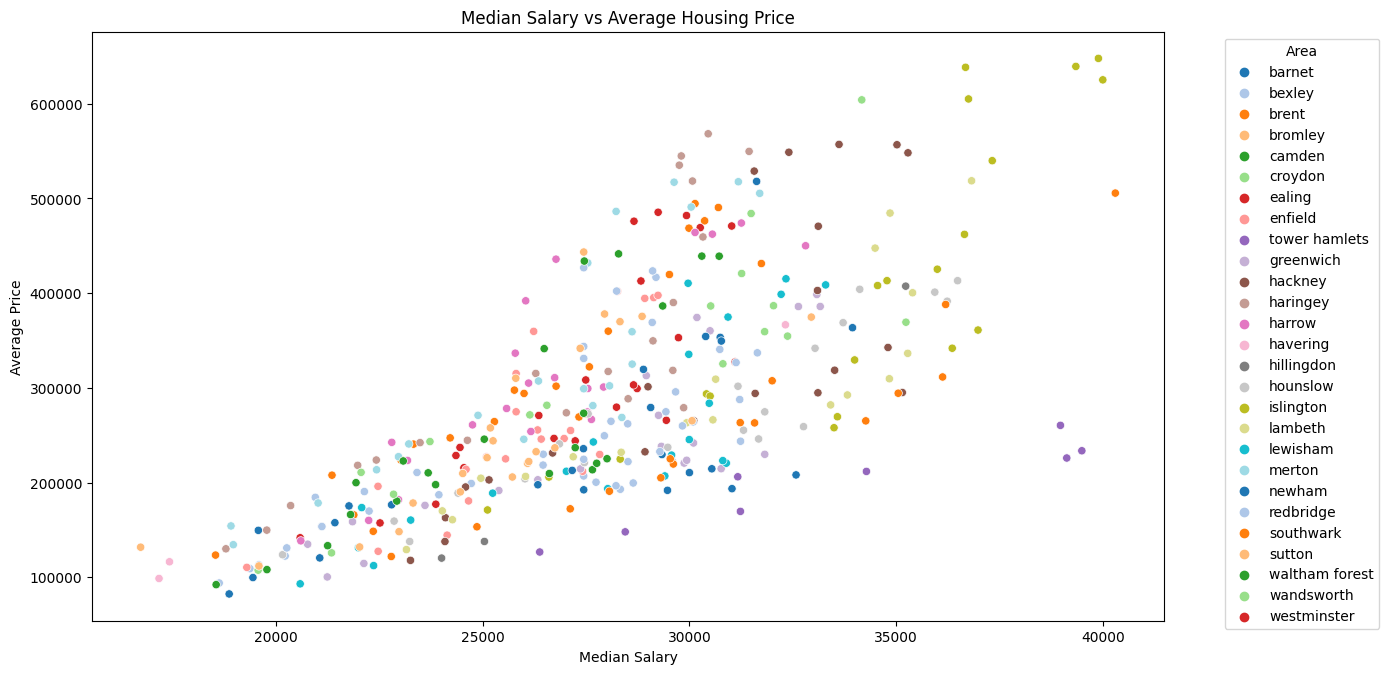

In [31]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=merged_df, x='median_salary', y='average_price', hue='area', palette='tab20')
plt.title('Median Salary vs Average Housing Price')
plt.xlabel('Median Salary')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Area')
plt.tight_layout()
plt.show()

# Positive skew, showing the higher the salary you have, the higher your housing price is. Seems like those in Islington have high salary and expsensive houses.

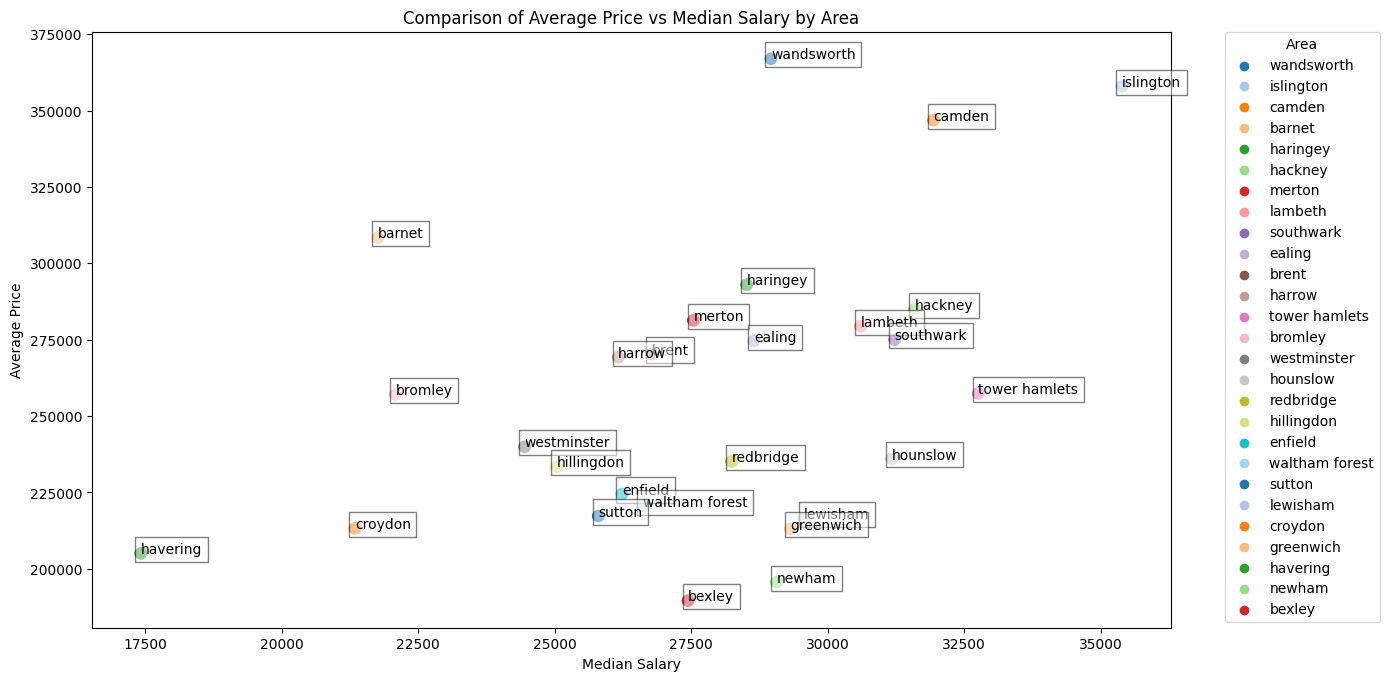

In [32]:
# Comparison of price vs salary
median_salary_by_area = cleaned_yearly_df.groupby('area')['median_salary'].median().reset_index()
price_salary_df = pd.merge(avg_price_by_area, median_salary_by_area, on='area')

plt.figure(figsize=(14, 7))
sns.scatterplot(data=price_salary_df, x='median_salary', y='average_price', hue='area', palette='tab20', s=100)

for i in range(price_salary_df.shape[0]):
    plt.text(x=price_salary_df['median_salary'][i], y=price_salary_df['average_price'][i], s=price_salary_df['area'][i], 
             fontdict=dict(color='black', size=10), bbox=dict(facecolor='white', alpha=0.5))

plt.title('Comparison of Average Price vs Median Salary by Area')
plt.xlabel('Median Salary')
plt.ylabel('Average Price')

# Adjust legend placement
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Area', borderaxespad=0.)

plt.tight_layout()
plt.show()

# Positive skew, showing the higher the salary you have, the higher your housing price is. Seems like those in Islington have high salary and one of expsensive houses.

bromley: 129829.0 houses sold
barnet: 126056.0 houses sold
croydon: 122490.0 houses sold
lambeth: 118695.0 houses sold
wandsworth: 118434.0 houses sold
enfield: 112664.0 houses sold
ealing: 110784.0 houses sold
lewisham: 108865.0 houses sold
hillingdon: 105463.0 houses sold
redbridge: 103253.0 houses sold
tower hamlets: 102254.0 houses sold
southwark: 100456.0 houses sold
bexley: 98093.0 houses sold
havering: 95877.0 houses sold
greenwich: 94868.0 houses sold
waltham forest: 93680.0 houses sold
sutton: 92141.0 houses sold
merton: 88004.0 houses sold
newham: 86978.0 houses sold
hounslow: 86214.0 houses sold
brent: 82355.0 houses sold
haringey: 81904.0 houses sold
harrow: 79663.0 houses sold
islington: 67642.0 houses sold
hackney: 66469.0 houses sold
camden: 59570.0 houses sold
westminster: 36409.0 houses sold


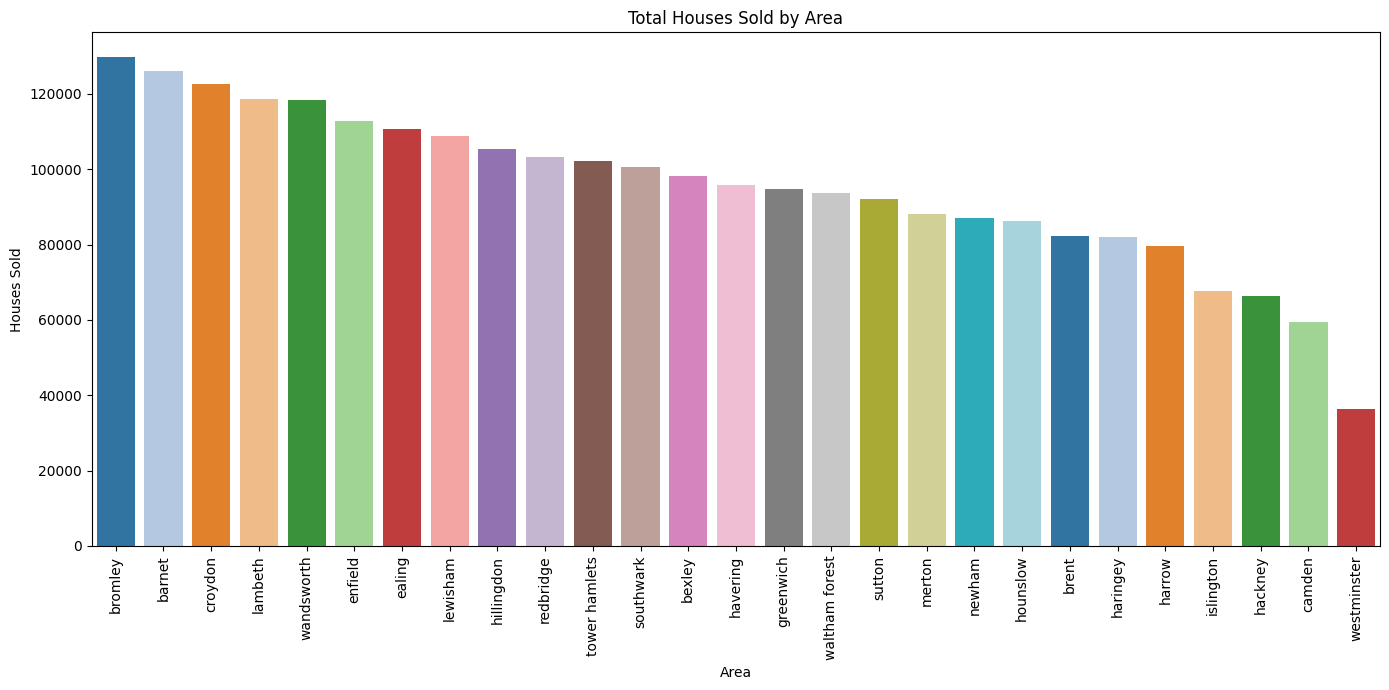

In [33]:
# Aggregate the number of houses sold by area
houses_sold_by_area = cleaned_monthly_df.groupby('area')['houses_sold'].sum().reset_index()

# Sort the data in descending order of houses sold
houses_sold_by_area = houses_sold_by_area.sort_values(by='houses_sold', ascending=False)

# Print the value counts
for index, row in houses_sold_by_area.iterrows():
    print(f"{row['area']}: {row['houses_sold']} houses sold")

# Plot the number of houses sold by area without annotations
plt.figure(figsize=(14, 7))
sns.barplot(data=houses_sold_by_area, x='area', y='houses_sold', palette='tab20')

# Customize the plot
plt.title('Total Houses Sold by Area')
plt.xlabel('Area')
plt.ylabel('Houses Sold')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Shows the total number of houses sold in each area. Bromley has sold the most houses.

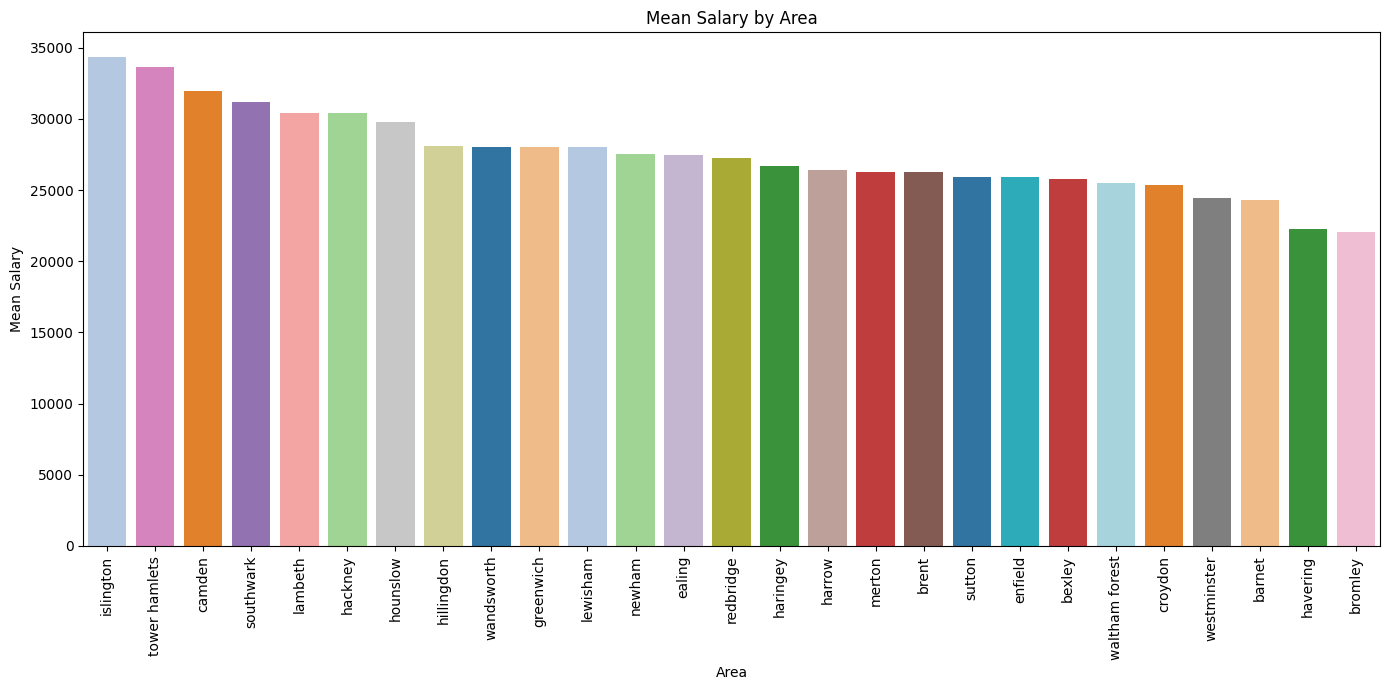

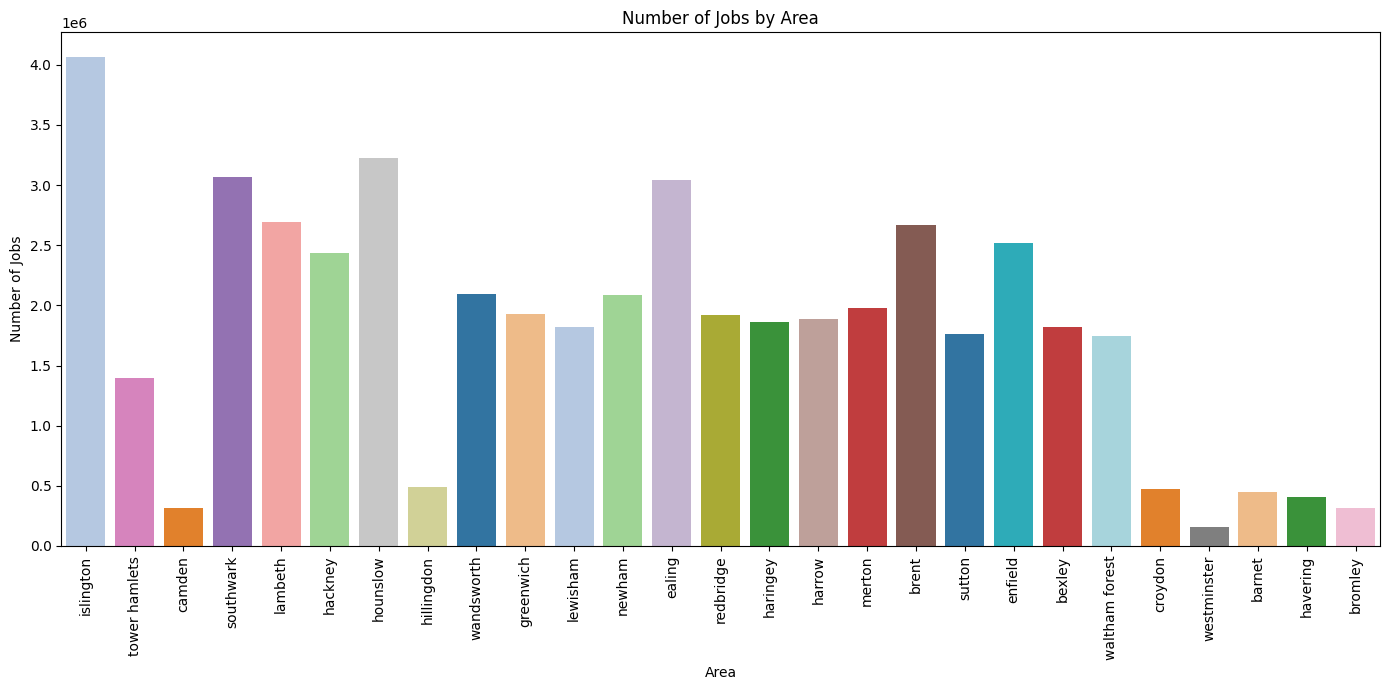

Mean Salaries by Area:
islington = 34366.40
tower hamlets = 33637.25
camden = 31936.50
southwark = 31200.60
lambeth = 30444.39
hackney = 30387.43
hounslow = 29801.67
hillingdon = 28090.33
wandsworth = 28049.44
greenwich = 28010.05
lewisham = 28003.33
newham = 27555.90
ealing = 27498.33
redbridge = 27223.90
haringey = 26727.57
harrow = 26431.43
merton = 26274.48
brent = 26254.67
sutton = 25933.24
enfield = 25890.38
bexley = 25805.19
waltham forest = 25498.48
croydon = 25379.67
westminster = 24447.00
barnet = 24317.67
havering = 22301.33
bromley = 22080.50

Number of Jobs by Area:
islington = 4066000.0
tower hamlets = 1393000.0
camden = 314000.0
southwark = 3070000.0
lambeth = 2694000.0
hackney = 2439000.0
hounslow = 3225000.0
hillingdon = 491000.0
wandsworth = 2095000.0
greenwich = 1926000.0
lewisham = 1818000.0
newham = 2090000.0
ealing = 3043000.0
redbridge = 1921000.0
haringey = 1862000.0
harrow = 1889000.0
merton = 1976000.0
brent = 2670000.0
sutton = 1765000.0
enfield = 2516000.0
b

In [34]:
# Calculate mean salary by area
mean_salary_by_area = cleaned_yearly_df.groupby('area')['median_salary'].mean().reset_index()

# Calculate number of jobs by area
jobs_by_area = cleaned_yearly_df.groupby('area')['number_of_jobs'].sum().reset_index()

# Create ordered areas based on average price
ordered_areas = sorted_avg_price_by_area['area']

# Ensure the color palette matches the area order
palette = sns.color_palette("tab20", n_colors=len(ordered_areas))
area_color_map = dict(zip(ordered_areas, palette))

# Sort mean salary by area in descending order and apply color map
mean_salary_by_area = mean_salary_by_area.sort_values(by='median_salary', ascending=False)
mean_salary_by_area['color'] = mean_salary_by_area['area'].map(area_color_map)

# Apply color map to jobs data
jobs_by_area['color'] = jobs_by_area['area'].map(area_color_map)

# Plot mean salary by area
plt.figure(figsize=(14, 7))
sns.barplot(data=mean_salary_by_area, x='area', y='median_salary', palette=mean_salary_by_area['color'].tolist())
plt.title('Mean Salary by Area')
plt.xlabel('Area')
plt.ylabel('Mean Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Ensure jobs data follows the same order as mean salary by area
jobs_by_area = jobs_by_area.set_index('area').loc[mean_salary_by_area['area']].reset_index()

# Plot number of jobs by area
plt.figure(figsize=(14, 7))
sns.barplot(data=jobs_by_area, x='area', y='number_of_jobs', palette=jobs_by_area['color'].tolist())
plt.title('Number of Jobs by Area')
plt.xlabel('Area')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print mean salaries by area
print("Mean Salaries by Area:")
for index, row in mean_salary_by_area.iterrows():
    print(f"{row['area']} = {row['median_salary']:.2f}")

# Print number of jobs by area
print("\nNumber of Jobs by Area:")
for index, row in jobs_by_area.iterrows():
    print(f"{row['area']} = {row['number_of_jobs']}")

# Graph 1: Shows the mean salary for each area. Islington has the highest mean salary compared to other areas, just like median salary.
# Graph 2: Shows the number of jobs for each area. Islington has the highest job roles.

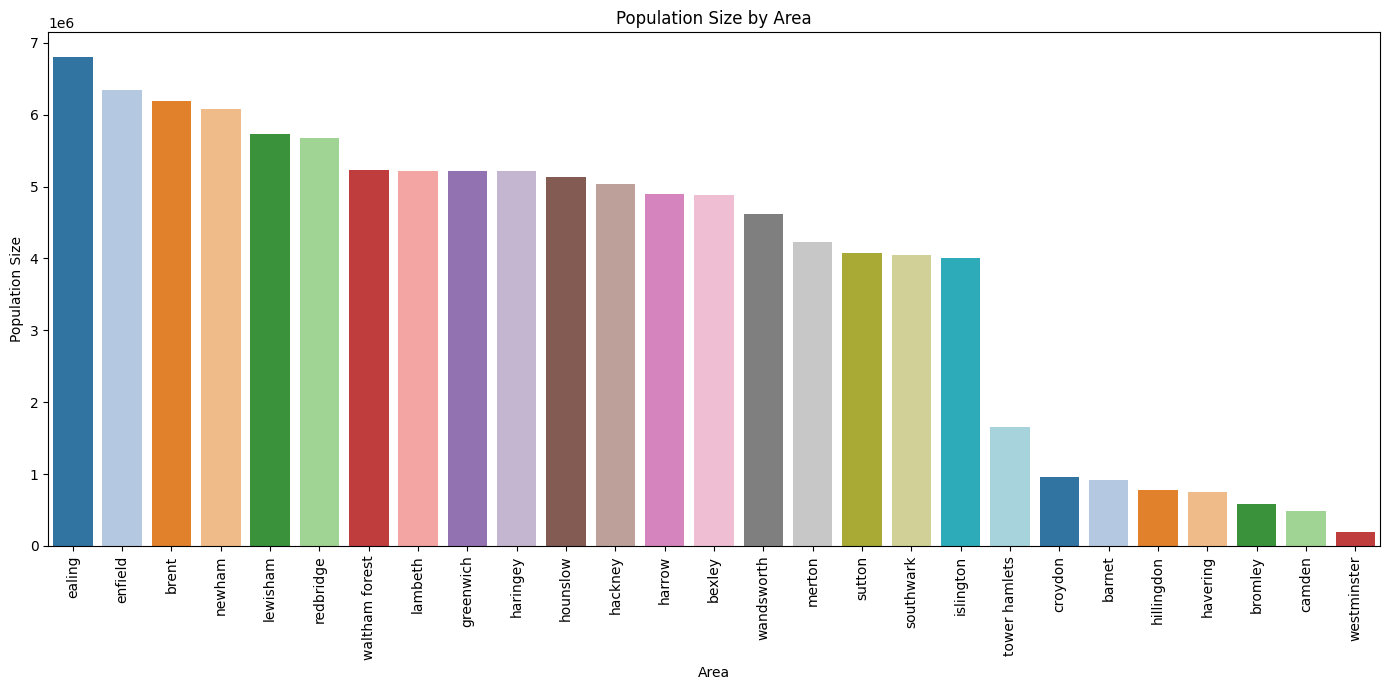

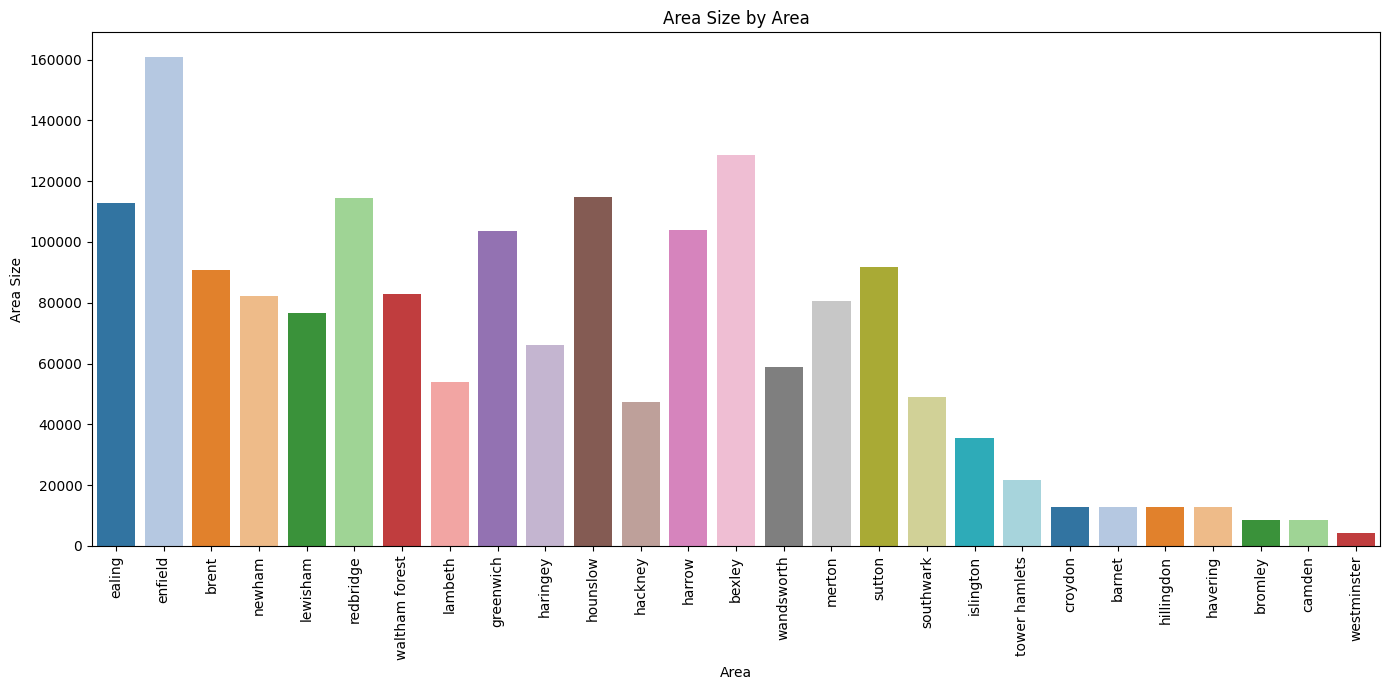

Population Sizes by Area:
ealing = 6806329.5
enfield = 6337991.5
brent = 6197628.5
newham = 6076996.5
lewisham = 5733595.5
redbridge = 5682075.5
waltham forest = 5224597.5
lambeth = 5219822.5
greenwich = 5217089.5
haringey = 5215017.5
hounslow = 5130044.5
hackney = 5029810.5
harrow = 4902781.5
bexley = 4889277.5
wandsworth = 4613637.5
merton = 4229566.5
sutton = 4080991.5
southwark = 4051704.5
islington = 4009854.0
tower hamlets = 1650348.0
croydon = 960910.5
barnet = 923856.5
hillingdon = 785567.5
havering = 745456.5
bromley = 589505.5
camden = 484606.5
westminster = 189233.0

Area Sizes by Area:
ealing = 112941.0
enfield = 160929.0
brent = 90783.0
newham = 82395.0
lewisham = 76545.0
redbridge = 114561.0
waltham forest = 82827.0
lambeth = 53844.0
greenwich = 103761.0
haringey = 66249.0
hounslow = 114831.0
hackney = 47259.0
harrow = 103797.0
bexley = 128691.0
wandsworth = 58755.0
merton = 80685.0
sutton = 91899.0
southwark = 48861.0
islington = 35394.0
tower hamlets = 21594.0
croydon =

In [35]:
# Calculate the relevant metrics by area
population_by_area = cleaned_yearly_df.groupby('area')['population_size'].sum().reset_index()
area_size_by_area = cleaned_yearly_df.groupby('area')['area_size'].sum().reset_index()
houses_sold_by_area = cleaned_monthly_df.groupby('area')['houses_sold'].sum().reset_index()

# Ensure areas are ordered in the same way
ordered_areas = population_by_area.sort_values(by='population_size', ascending=False)['area']
population_by_area = population_by_area.set_index('area').loc[ordered_areas].reset_index()
area_size_by_area = area_size_by_area.set_index('area').loc[ordered_areas].reset_index()
houses_sold_by_area = houses_sold_by_area.set_index('area').loc[ordered_areas].reset_index()

# Create color palette
palette = sns.color_palette("tab20", n_colors=len(ordered_areas))

# Create area to color map
area_color_map = dict(zip(ordered_areas, palette))

# Apply color map to dataframes
population_by_area['color'] = population_by_area['area'].map(area_color_map)
area_size_by_area['color'] = area_size_by_area['area'].map(area_color_map)
houses_sold_by_area['color'] = houses_sold_by_area['area'].map(area_color_map)

# Plot population size by area
plt.figure(figsize=(14, 7))
sns.barplot(data=population_by_area, x='area', y='population_size', palette=population_by_area['color'].tolist())
plt.title('Population Size by Area')
plt.xlabel('Area')
plt.ylabel('Population Size')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot area size by area
plt.figure(figsize=(14, 7))
sns.barplot(data=area_size_by_area, x='area', y='area_size', palette=area_size_by_area['color'].tolist())
plt.title('Area Size by Area')
plt.xlabel('Area')
plt.ylabel('Area Size')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print population sizes by area
print("Population Sizes by Area:")
for index, row in population_by_area.iterrows():
    print(f"{row['area']} = {row['population_size']}")

# Print area sizes by area
print("\nArea Sizes by Area:")
for index, row in area_size_by_area.iterrows():
    print(f"{row['area']} = {row['area_size']}")
    
# Graph 1: This shows the population of each area. It seems that Ealing has the highest population size.
# Graph 2: Shows the area size of an area. Seems like Enfield has a bigger area size than all.

ealing: 2579029.0 houses
enfield: 2471109.0 houses
lewisham: 2408357.0 houses
brent: 2291324.0 houses
lambeth: 2227395.0 houses
greenwich: 2161318.0 houses
newham: 2150537.0 houses
haringey: 2140168.0 houses
redbridge: 2101470.0 houses
hackney: 2094450.0 houses
waltham forest: 2054646.0 houses
bexley: 2011053.0 houses
hounslow: 2001595.0 houses
wandsworth: 1981547.0 houses
islington: 1898409.0 houses
harrow: 1846172.0 houses
merton: 1773795.0 houses
sutton: 1741527.0 houses
southwark: 1690501.0 houses
tower hamlets: 715950.0 houses
barnet: 307206.0 houses
hillingdon: 307206.0 houses
havering: 307206.0 houses
croydon: 307206.0 houses
camden: 204804.0 houses
bromley: 204804.0 houses
westminster: 102402.0 houses


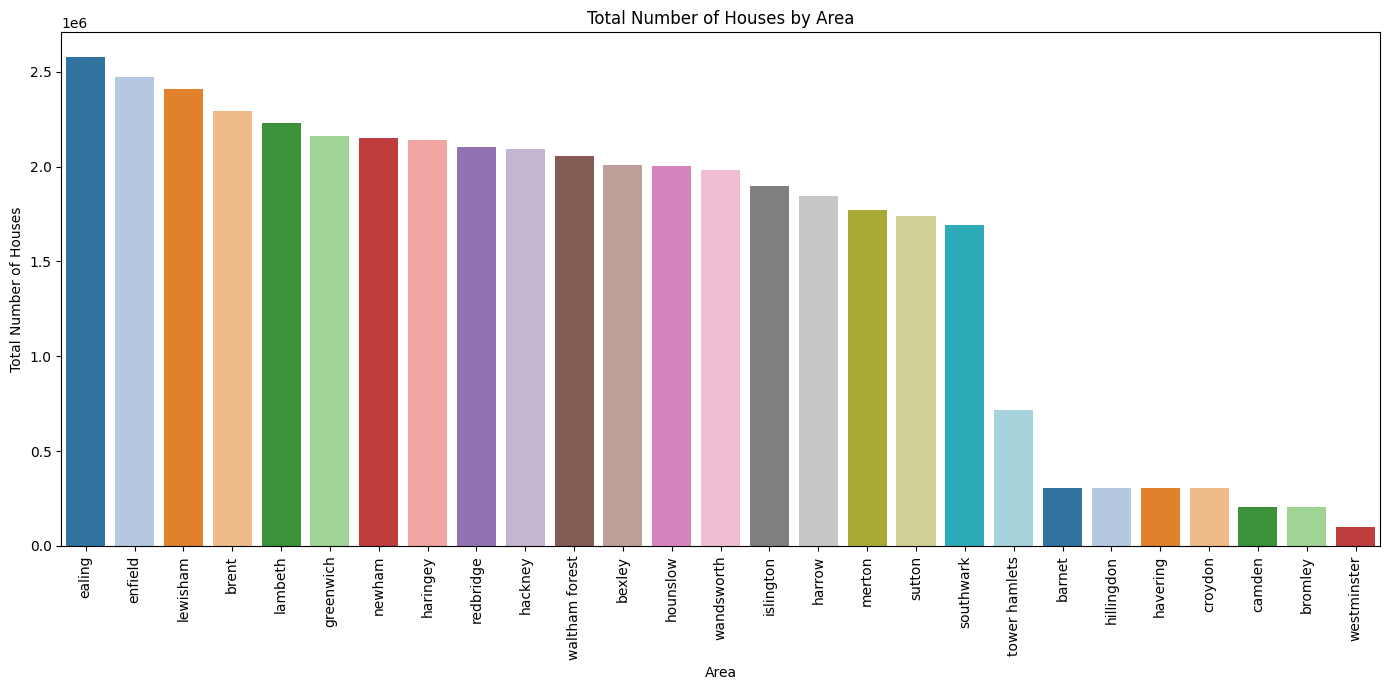

In [46]:
# Group by area and calculate the total number of houses
houses_by_area = cleaned_yearly_df.groupby('area')['no_of_houses'].sum().reset_index()

# Sort by number of houses for better visualization
houses_by_area = houses_by_area.sort_values(by='no_of_houses', ascending=False)

# Print the value counts
for index, row in houses_by_area.iterrows():
    print(f"{row['area']}: {row['no_of_houses']} houses")

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=houses_by_area, x='area', y='no_of_houses', palette="tab20")

# Customize the plot
plt.title('Total Number of Houses by Area')
plt.xlabel('Area')
plt.ylabel('Total Number of Houses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


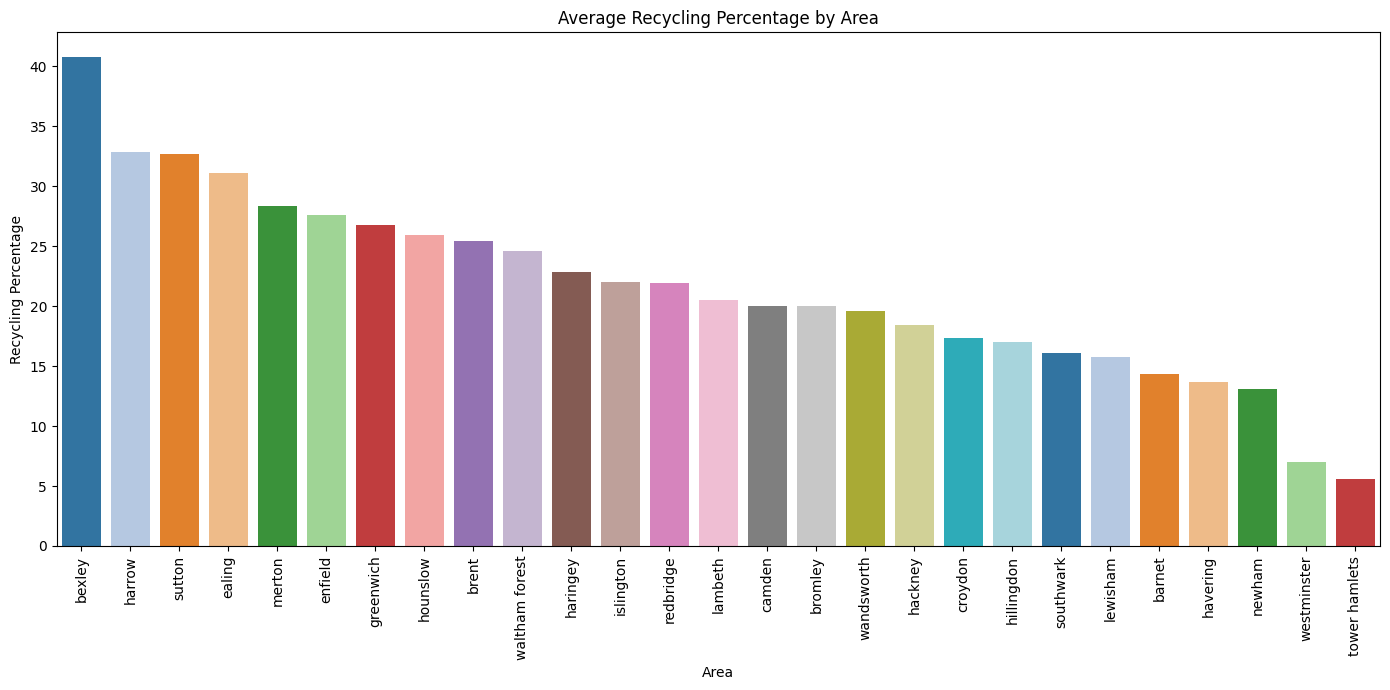

Recycling Percentages by Area:
bexley = 40.81%
harrow = 32.90%
sutton = 32.67%
ealing = 31.10%
merton = 28.38%
enfield = 27.62%
greenwich = 26.76%
hounslow = 25.95%
brent = 25.43%
waltham forest = 24.62%
haringey = 22.86%
islington = 22.00%
redbridge = 21.90%
lambeth = 20.56%
camden = 20.00%
bromley = 20.00%
wandsworth = 19.62%
hackney = 18.43%
croydon = 17.33%
hillingdon = 17.00%
southwark = 16.07%
lewisham = 15.76%
barnet = 14.33%
havering = 13.67%
newham = 13.10%
westminster = 7.00%
tower hamlets = 5.62%


In [37]:
# Calculate the average recycling percentage by area
recycling_pct_by_area = cleaned_yearly_df.groupby('area')['recycling_pct'].mean().reset_index()

# Ensure areas are ordered in the same way
ordered_areas = recycling_pct_by_area.sort_values(by='recycling_pct', ascending=False)['area']
recycling_pct_by_area = recycling_pct_by_area.set_index('area').loc[ordered_areas].reset_index()

# Create color palette
palette = sns.color_palette("tab20", n_colors=len(ordered_areas))

# Create area to color map
area_color_map = dict(zip(ordered_areas, palette))

# Apply color map to dataframe
recycling_pct_by_area['color'] = recycling_pct_by_area['area'].map(area_color_map)

# Plot recycling percentage by area
plt.figure(figsize=(14, 7))
sns.barplot(data=recycling_pct_by_area, x='area', y='recycling_pct', palette=recycling_pct_by_area['color'].tolist())
plt.title('Average Recycling Percentage by Area')
plt.xlabel('Area')
plt.ylabel('Recycling Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print recycling percentages by area
print("Recycling Percentages by Area:")
for index, row in recycling_pct_by_area.iterrows():
    print(f"{row['area']} = {row['recycling_pct']:.2f}%")

# Shows recylcing percentages in each area. Bexley seems to be the cleanest place so far.

Total Number of Crimes by Area:
lambeth: 719454.0 crimes
southwark: 693541.0 crimes
newham: 652978.0 crimes
ealing: 597017.0 crimes
hackney: 589847.0 crimes
tower hamlets: 579110.0 crimes
islington: 556991.0 crimes
brent: 553173.0 crimes
haringey: 551072.0 crimes
croydon: 542187.0 crimes
lewisham: 525889.0 crimes
barnet: 506810.0 crimes
greenwich: 493472.0 crimes
hillingdon: 490465.0 crimes
waltham forest: 484014.0 crimes
camden: 478043.0 crimes
hounslow: 467213.0 crimes
enfield: 466726.0 crimes
redbridge: 444370.0 crimes
wandsworth: 416173.0 crimes
bromley: 413909.0 crimes
havering: 350452.0 crimes
bexley: 297576.0 crimes
harrow: 287761.0 crimes
merton: 276773.0 crimes
sutton: 246911.0 crimes
westminster: 66403.0 crimes


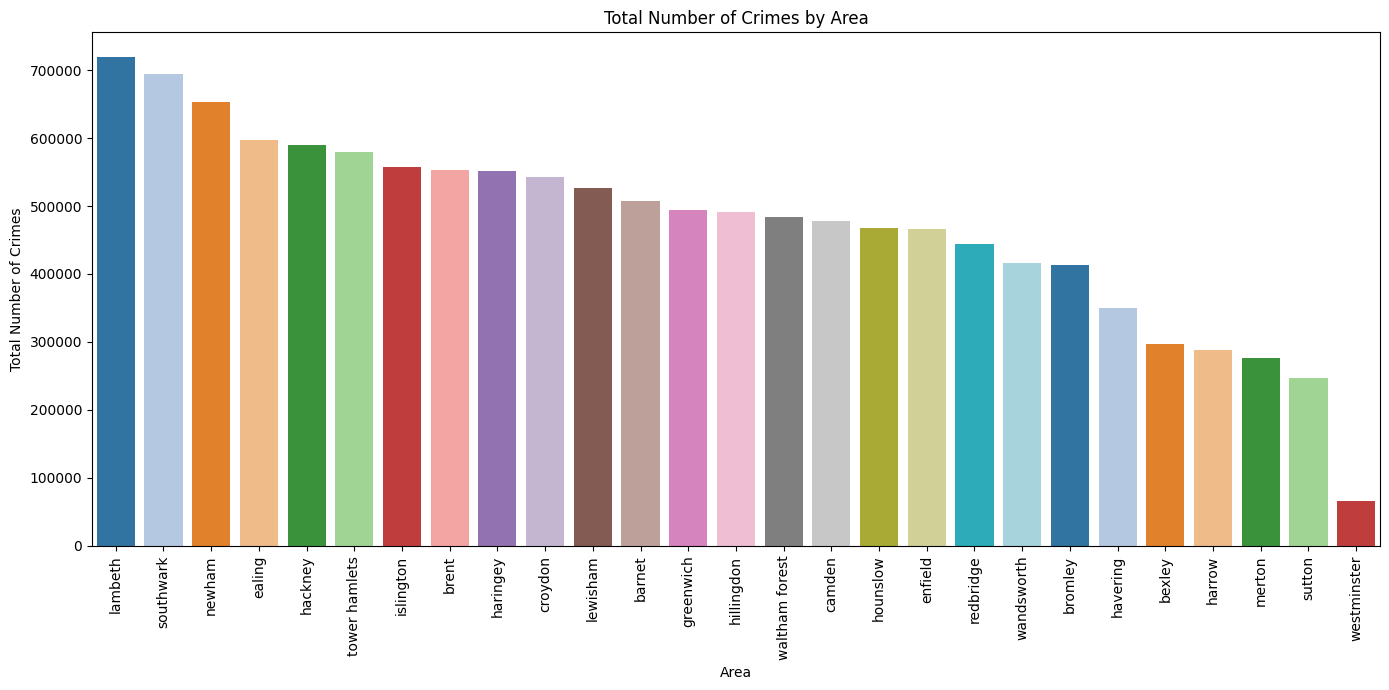

In [50]:
# Group by area and sum the number of crimes
crimes_by_area = cleaned_monthly_df.groupby('area')['no_of_crimes'].sum().reset_index()

# Sort by number of crimes for better visualization
crimes_by_area = crimes_by_area.sort_values(by='no_of_crimes', ascending=False)

# Print the total number of crimes for each area
print("Total Number of Crimes by Area:")
for index, row in crimes_by_area.iterrows():
    print(f"{row['area']}: {row['no_of_crimes']} crimes")

# Set a solid color palette
solid_palette = sns.color_palette("tab20", n_colors=len(crimes_by_area))

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=crimes_by_area, x='area', y='no_of_crimes', palette=solid_palette)
plt.title('Total Number of Crimes by Area')
plt.xlabel('Area')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Shows the number of total crime in each area from 1995 till 2020.

Yearly Average Housing Prices by Area:

Area: barnet
  1995: 91792.50
  1996: 94000.42
  1997: 106851.27
  1998: 122359.25
  1999: 135000.75
  2000: 167952.67
  2001: 185369.91
  2002: 219128.80
  2003: 251212.83
  2004: 271257.90
  2005: 279459.67
  2006: 291337.75
  2007: 326915.42
  2008: 330023.33
  2009: 299103.00
  2010: 333128.08
  2011: 338978.00
  2012: 358627.42
  2013: 374770.58
  2014: 430363.33
  2015: 478688.08
  2016: 527084.73
  2017: 538280.92
  2018: 533266.42
  2019: 519552.58
  2020: 520682.00

Area: bexley
  1995: 64291.58
  1996: 65490.50
  1997: 70789.50
  1998: 80632.00
  1999: 86777.67
  2000: 103186.50
  2001: 116527.08
  2002: 136798.00
  2003: 164482.08
  2004: 179141.25
  2005: 186512.00
  2006: 191831.25
  2007: 208085.92
  2008: 210199.08
  2009: 189050.83
  2010: 200874.08
  2011: 200672.08
  2012: 202546.42
  2013: 213470.25
  2014: 244459.58
  2015: 274209.25
  2016: 321563.67
  2017: 335694.42
  2018: 342603.58
  2019: 337537.17
  2020: 331683.00

Are

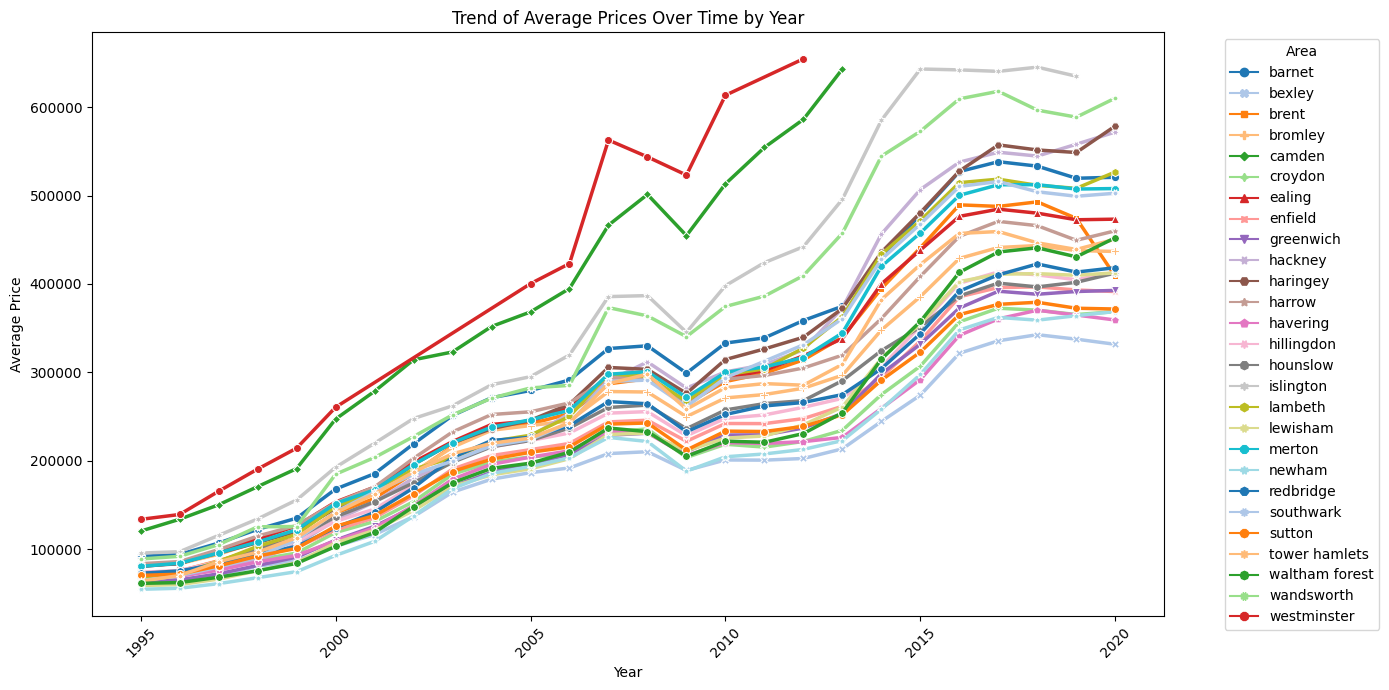

In [49]:
# Ensure date columns are in datetime format
cleaned_monthly_df['date'] = pd.to_datetime(cleaned_monthly_df['date'])

# Aggregate data to get yearly average price for each area
cleaned_monthly_df['year'] = cleaned_monthly_df['date'].dt.year
yearly_avg_price = cleaned_monthly_df.groupby(['year', 'area'])['average_price'].mean().reset_index()

# Print the yearly average prices for each area
print("Yearly Average Housing Prices by Area:")
for area in yearly_avg_price['area'].unique():
    print(f"\nArea: {area}")
    area_data = yearly_avg_price[yearly_avg_price['area'] == area]
    for index, row in area_data.iterrows():
        print(f"  {row['year']}: {row['average_price']:.2f}")

# Plot trend of average prices over time by year
plt.figure(figsize=(14, 7))

# Use a color palette with enough unique colors
palette = sns.color_palette("tab20", n_colors=len(yearly_avg_price['area'].unique()))

# Use markers to differentiate lines
sns.lineplot(data=yearly_avg_price, x='year', y='average_price', hue='area', palette=palette, style='area', markers=True, dashes=False, linewidth=2.5)

plt.title('Trend of Average Prices Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 
# This shows that there has been an increase in average prices for houses over the years. Seems like Westiminster, Camden, Islington and Wandsworth has shown a great increase in average price change from 1995 till 2020.

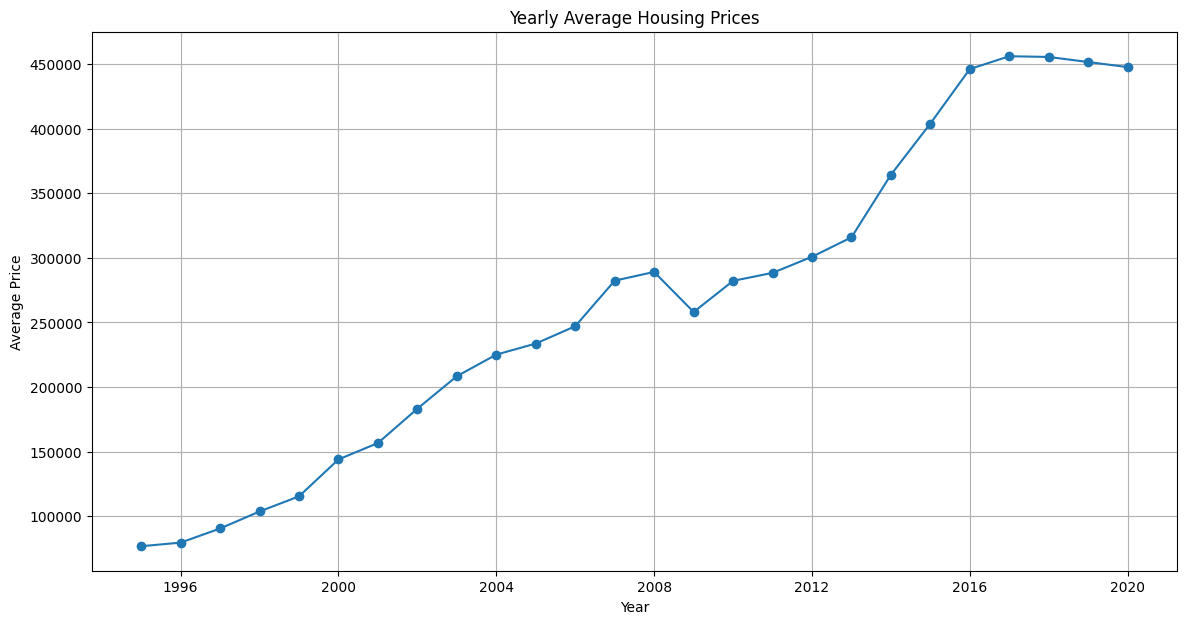

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure date columns are in datetime format
cleaned_monthly_df['date'] = pd.to_datetime(cleaned_monthly_df['date'])

# Aggregate data to get yearly average price for all of London
cleaned_monthly_df['year'] = cleaned_monthly_df['date'].dt.year
yearly_avg_price_all = cleaned_monthly_df.groupby('year')['average_price'].mean()

# Ensure the index is the year for the time series
yearly_avg_price_all.index = pd.to_datetime(yearly_avg_price_all.index, format='%Y')
yearly_avg_price_all.index.freq = 'AS-JAN'  # Set frequency to start of year

# Plot the yearly average prices
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_price_all.index, yearly_avg_price_all, marker='o')
plt.title('Yearly Average Housing Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

#Shows that houses has been growing over the years.

/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sari

Best ARIMA order: (1, 1, 1)


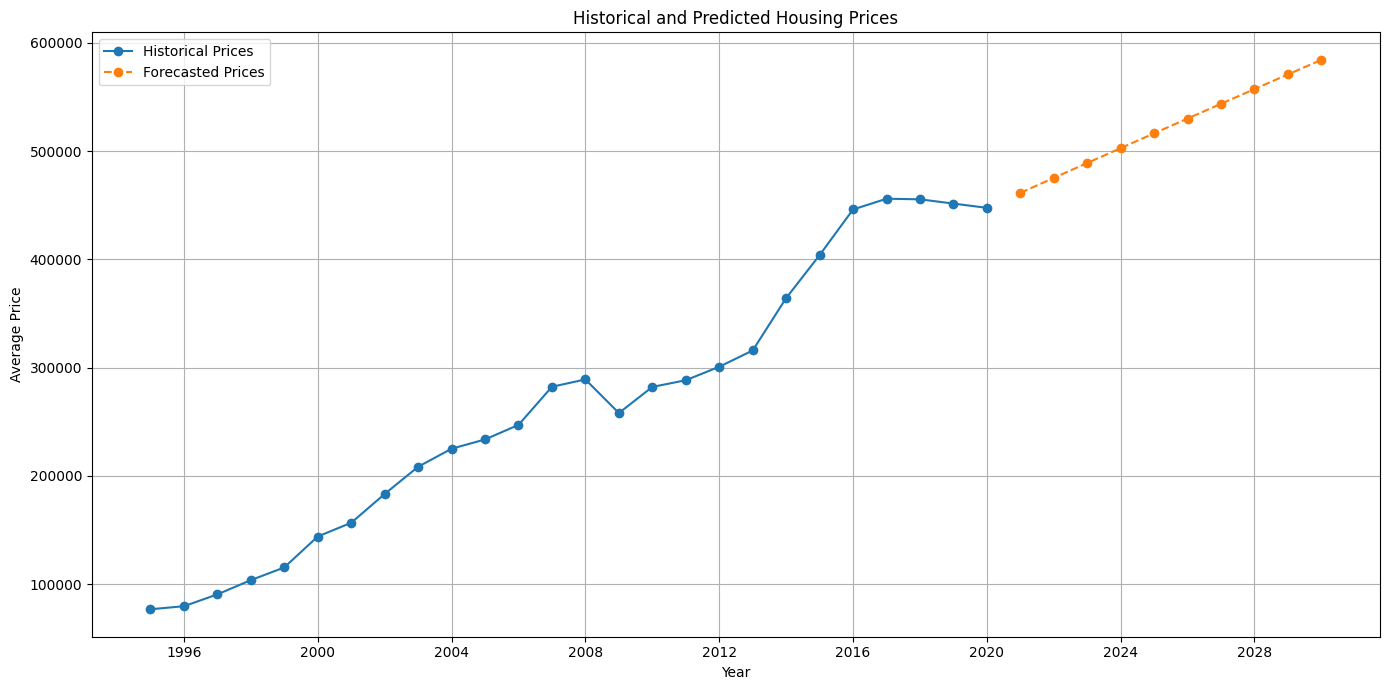

In [41]:
# Function to find the best ARIMA parameters
def find_best_arima_model(data, p_range, d_range, q_range):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(data, order=(p, d, q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except:
                    continue
    return best_order, best_model

# Find the best ARIMA parameters
p_range = range(0, 6)
d_range = range(0, 2)
q_range = range(0, 6)
best_order, best_model = find_best_arima_model(yearly_avg_price_all, p_range, d_range, q_range)

print(f"Best ARIMA order: {best_order}")

# Make predictions for the next 10 years
forecast = best_model.forecast(steps=10)
forecast_years = pd.date_range(start=yearly_avg_price_all.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')

# Plot the historical and predicted prices
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_price_all.index, yearly_avg_price_all, label='Historical Prices', marker='o')
plt.plot(forecast_years, forecast, label='Forecasted Prices', linestyle='--', marker='o')
plt.title('Historical and Predicted Housing Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predicting the future behave with the gathered data, it's predicted that housing will continue to increase over the next 10 years.

/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/kas/legacy/kate_python_37/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/kas/legacy/kate_python_37/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

Best ARIMA order on training data: (1, 1, 1)
Mean Absolute Error (MAE): 29208.524846441218
Mean Squared Error (MSE): 1137778697.0733383
Root Mean Squared Error (RMSE): 33730.975335340336


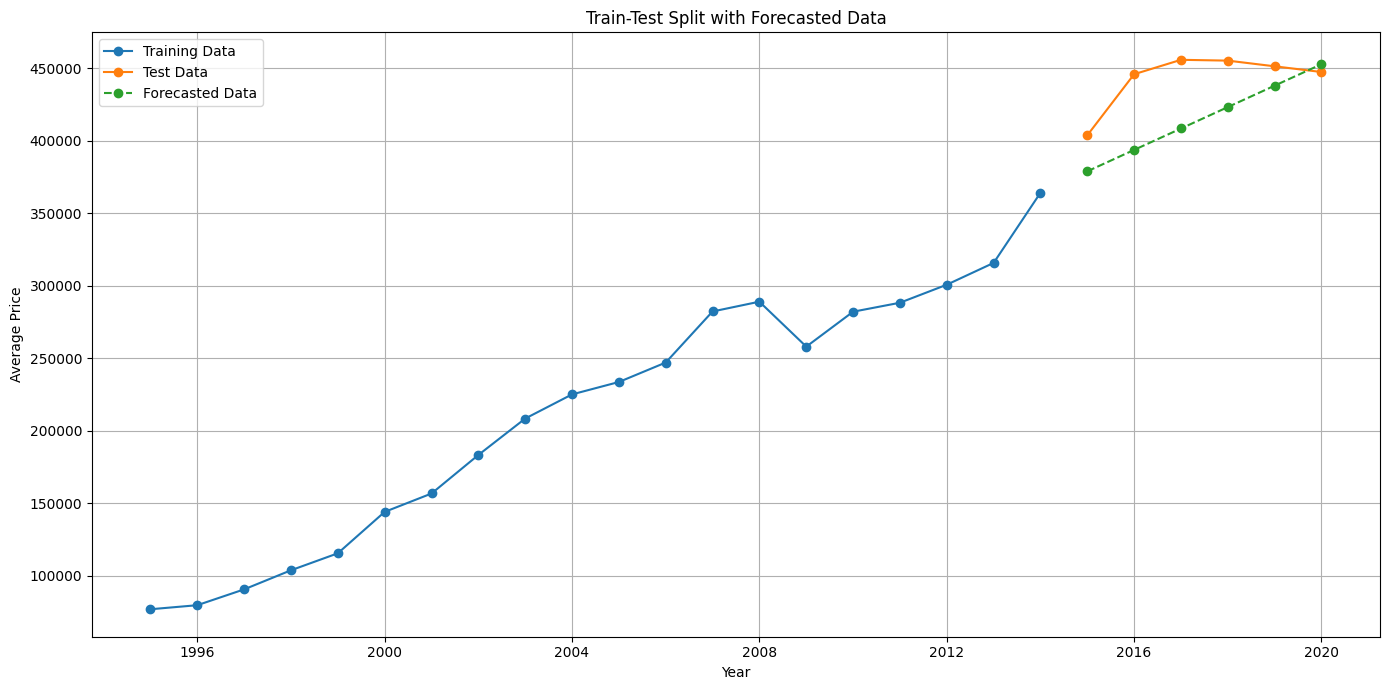

In [42]:
# Split the data into training and test sets
train_size = int(len(yearly_avg_price_all) * 0.8)
train, test = yearly_avg_price_all[:train_size], yearly_avg_price_all[train_size:]

# Fit the ARIMA model on the training set
best_order, best_model = find_best_arima_model(train, p_range, d_range, q_range)
print(f"Best ARIMA order on training data: {best_order}")

# Make predictions on the test set
forecast_test = best_model.forecast(steps=len(test))

# Calculate performance metrics
mae = mean_absolute_error(test, forecast_test)
mse = mean_squared_error(test, forecast_test)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data', marker='o')
plt.plot(test.index, test, label='Test Data', marker='o')
plt.plot(test.index, forecast_test, label='Forecasted Data', linestyle='--', marker='o')
plt.title('Train-Test Split with Forecasted Data')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Shows the test for forecasted data to be true.